In [4]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [22]:
DIR=r'images\Original Dataset'

In [6]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [7]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [8]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


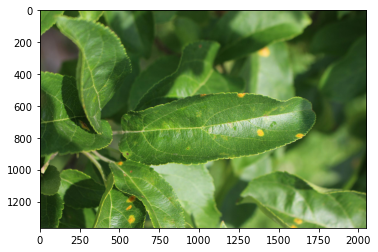

In [10]:
image1=Image.open(r'images\Original Dataset\Test_0.jpg')
plt.imshow(image1)
plt.show()

# Prepare the Training Data

In [11]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [12]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [13]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [14]:
DIR

'images\\Original Dataset'

In [15]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [24]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [25]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'images\test')
                

In [26]:
shutil.os.mkdir(r'images\train')
shutil.os.mkdir(r'images\train\healthy')
shutil.os.mkdir(r'images\train\multiple_disease')
shutil.os.mkdir(r'images\train\rust')
shutil.os.mkdir(r'images\train\scab')
shutil.os.mkdir(r'images\test')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'images\\train'

In [27]:
train_dir=create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:31<00:00, 115.24it/s]


# Data Preprocessing

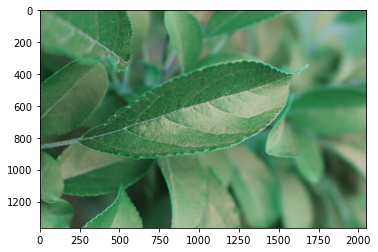

In [28]:
Train_DIR=r'images\train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

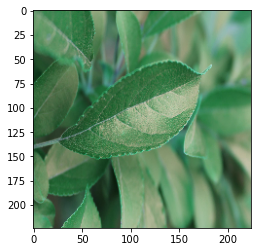

In [29]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [31]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [32]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [33]:
checkpoint=ModelCheckpoint(r'models\apple3.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [34]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\deepa\AppData\Local\Temp/ipykernel_10368/1407545075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2677 - accuracy: 0.3086
Epoch 00001: val_loss improved from inf to 1.24779, saving model to models\apple3.h5
91/91 [==============================] - 148s 2s/step - loss: 1.2677 - accuracy: 0.3086 - val_loss: 1.2478 - val_accuracy: 0.3182
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2460 - accuracy: 0.3433
Epoch 00002: val_loss improved from 1.24779 to 1.23033, saving model to models\apple3.h5
91/91 [==============================] - 132s 1s/step - loss: 1.2460 - accuracy: 0.3433 - val_loss: 1.2303 - val_accuracy: 0.3466
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2380 - accuracy: 0.3523
Epoch 00003: val_loss improved from 1.23033 to 1.22035, saving model to models\apple3.h5
91/91 [==============================] - 144s 2s/step - loss: 1.2380 - accuracy: 0.3523 - val_loss: 1.2203 - val_accuracy: 0.3580
Epoch 4/30
91/91 [==============================] - ETA: 0s - los

91/91 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9230
Epoch 00028: val_loss did not improve from 0.24033
91/91 [==============================] - 128s 1s/step - loss: 0.2242 - accuracy: 0.9230 - val_loss: 0.2711 - val_accuracy: 0.9176
Epoch 29/30
91/91 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 0.9341
Epoch 00029: val_loss did not improve from 0.24033
91/91 [==============================] - 135s 1s/step - loss: 0.2069 - accuracy: 0.9341 - val_loss: 0.2613 - val_accuracy: 0.9006
Epoch 30/30
91/91 [==============================] - ETA: 0s - loss: 0.2172 - accuracy: 0.9223
Epoch 00030: val_loss did not improve from 0.24033
91/91 [==============================] - 141s 2s/step - loss: 0.2172 - accuracy: 0.9223 - val_loss: 0.2560 - val_accuracy: 0.9176


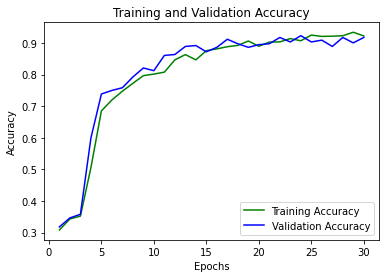

In [35]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

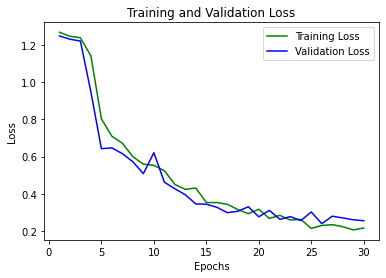

In [36]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the Prediction on a Single Image

In [37]:
from tensorflow.keras.models import load_model
model.save('modelff.h5')

3


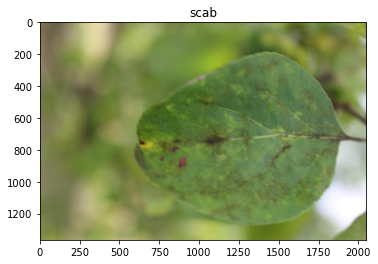

In [40]:
test_image=r'images\test\Test_7.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

2


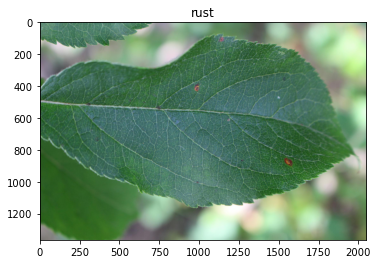

In [44]:
test_image=r'images\test\Test_10.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()